In [1]:
import glob
import numpy as np

train_path = "./db_dep/train/"
train_files = glob.glob(train_path + "person-*/*.png")

In [149]:
def apply_average(average_image, current_image):
    """
    Average pixels on current image
    :param average_image: previously calculated average image
    :param current_image: sum of images depending on batch_size
    :return:  average image where non-white pixels are averaged
    """
    nonzero_values_ids = np.where(current_image < 255)
    # nonzero values of current image
    cur_nonzero = current_image[nonzero_values_ids]
    # the corresponding values on average image
    av_nonzero = average_image[nonzero_values_ids]
    averaged_pixels = 0.5 * (av_nonzero + cur_nonzero / batch_size)

    # paste pixels on original image
    average_image[nonzero_values_ids] = averaged_pixels
    return average_image

def merge_to_one(image, img_idx):
    global sum_image, average_image
    if img_idx == 0:
        average_image = np.full_like(average_image, 255)
    sum_image += np.asarray(image)
    print(np.asarray(image)[0,0], image.getpixel((0,0)))
    if img_idx % batch_size == 0:
        average_image = apply_average(average_image, sum_image)
        average_image = average_image.astype(np.uint8)
        sum_image = np.zeros_like(average_image)
    return average_image
    

./db_dep/train/person-4/frame11_dep.png PNG (116, 120)xL
255 255


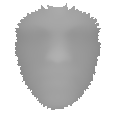

./db_dep/train/person-7/frame11_dep.png PNG (116, 120)xL
255 255


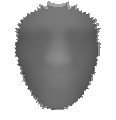

./db_dep/train/person-3/frame11_dep.png PNG (116, 120)xL
255 255


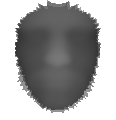

./db_dep/train/person-26/frame11_dep.png PNG (116, 120)xL
255 255


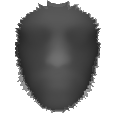

./db_dep/train/person-8/frame11_dep.png PNG (116, 120)xL
255 255


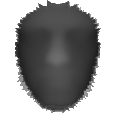

./db_dep/train/person-23/frame11_dep.png PNG (116, 120)xL
255 255


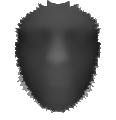

./db_dep/train/person-28/frame11_dep.png PNG (116, 120)xL
255 255


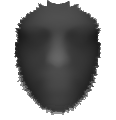

./db_dep/train/person-11/frame11_dep.png PNG (116, 120)xL
255 255


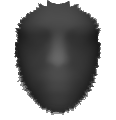

./db_dep/train/person-15/frame11_dep.png PNG (116, 120)xL
255 255


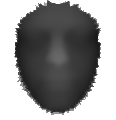

./db_dep/train/person-21/frame11_dep.png PNG (116, 120)xL
255 255


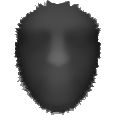

./db_dep/train/person-5/frame11_dep.png PNG (116, 120)xL
255 255


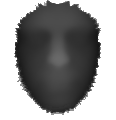

./db_dep/train/person-12/frame11_dep.png PNG (116, 120)xL
255 255


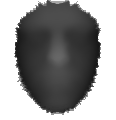

./db_dep/train/person-13/frame11_dep.png PNG (116, 120)xL
255 255


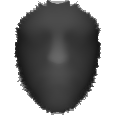

./db_dep/train/person-6/frame11_dep.png PNG (116, 120)xL
255 255


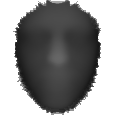

./db_dep/train/person-14/frame11_dep.png PNG (116, 120)xL
255 255


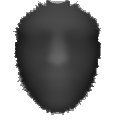

./db_dep/train/person-22/frame11_dep.png PNG (116, 120)xL
255 255


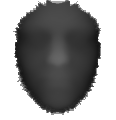

./db_dep/train/person-25/frame11_dep.png PNG (116, 120)xL
255 255


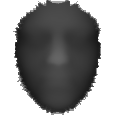

./db_dep/train/person-9/frame11_dep.png PNG (116, 120)xL
255 255


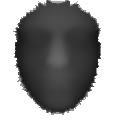

./db_dep/train/person-24/frame11_dep.png PNG (116, 120)xL
255 255


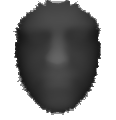

./db_dep/train/person-2/frame11_dep.png PNG (116, 120)xL
255 255


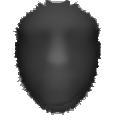

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [146]:
from PIL import Image

img_idx = 0
average_image = np.full((120, 116), 255, dtype = np.uint)
batch_size = 1
sum_image = np.zeros_like(average_image)
for infile in train_files:
    try:
        with Image.open(infile) as im:
            if im.mode != "L":
                print("Expected 8-bit pixels, black and white image. Exiting...")
                exit(1)
            print(infile, im.format, f"{im.size}x{im.mode}")
            av_img = merge_to_one(im, img_idx)
            img_idx += 1
            pil_img = Image.fromarray(av_img, mode="L")
            display(pil_img)
    except OSError:
        pass
display(av_img)

[[  0 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


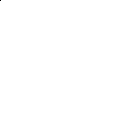

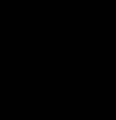

0 0
[[127 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
0 0
[[ 63 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]]
0 0
[[ 31 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]]


In [157]:
def test_merging():
    average_image = np.full((120, 116), 255, dtype = np.uint)
    batch_size = 1
    sum_image = np.zeros_like(average_image)

    img1 = Image.new("L", (116, 120), "white")
    img1.putpixel((0, 0), 0)
    print(np.asarray(img1))
    img2 = Image.new("L", (116, 120), "black")
    av_img = merge_to_one(img1, 0)
    assert av_img[0, 0] == 127
    assert av_img.shape == (120, 116)
    av_img = merge_to_one(img2, 1)
    assert av_img[0, 0] == 63
    av_img = merge_to_one(img1, 2)
    assert av_img[0, 0] == 31

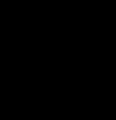

In [123]:
img3 = Image.new("RGB", (116, 120), "black")
display(img3)

[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]]


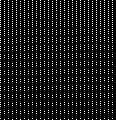

In [179]:
print(av_img)
display(Image.fromarray(av_img, mode="L"))

In [87]:
a = np.array([255,2,3], dtype=np.uint8)
b = a.astype(np.int)
print(a, b)

[255   2   3] [255   2   3]
